equal width binning: 

if **n -> `no of bins`** <br>
now we use the formula:
<br>
`(max - min) / n`

- helps to handle outiers
- no change in spread of data

equal frequency binning: 
if **n -> `no of intervals`** <br>
each interval contains 10% of the data

eg : between 0-16 yrs 10% of the population resides <br>
16-20 -> 10% and so on

no equal width

K-means binning

-> makes clusters and used when data are present as clusters (***** ............. *****, ***** ......... *****)

# K-means binning (also called k-means discretization) — explained clearly

K-means binning is a data transformation technique where a continuous numeric feature is converted into discrete bins using the k-means clustering algorithm.

Instead of cutting the data into equal ranges (like equal-width binning) or equal counts (equal-frequency binning), k-means binning groups values based on similarity.

1. **Why do we need binning at all?**

Many machine-learning models:

- Handle categorical or discrete values better

- Are sensitive to outliers

- Learn more stable patterns from grouped values

**Binning:**

Reduces noise

Simplifies complex numeric distributions

Can improve model performance and interpretability

**2. What k-means binning does (intuition)**

Suppose you have this numeric feature:

Salary:
20, 22, 23, 25, 60, 65, 70, 75, 120, 130


You want 3 bins.

Instead of fixed intervals, k-means:

Treats salary as 1-D data

Runs k-means clustering with `k = 3`

Finds 3 cluster centers where values are naturally close

Assigns each value to the nearest cluster

Resulting bins may look like:

*Low salary group*

*Medium salary group*

*High salary group*

These bins are data-driven, not arbitrary.

**3. How k-means binning works (step by step)**

For a numeric column 
`𝑋`
X:

Choose number of bins 
`𝑘`
k

Apply k-means clustering on 
𝑋
X (as a 1-D array)

Each cluster = one bin

Replace original values with:

Cluster labels (0, 1, 2, …)

OR bin ranges (optional)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [7]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [8]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [12]:
df.dropna(inplace=True)

In [17]:
df.shape

(714, 3)

In [18]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [20]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [22]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [23]:
clf = DecisionTreeClassifier()

In [26]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.6433566433566433

In [29]:
np.mean(cross_val_score(DecisionTreeClassifier(), X,y, cv = 10, scoring = 'accuracy'))

np.float64(0.6289123630672926)

In [31]:
kbin_age = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')
kbin_fare = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')

In [32]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare,[1])
])

In [34]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/preprocessing/_discretization.py:304: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [35]:
trf.named_transformers_['first'].n_bins_

array([10])

In [36]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [37]:
output

,age,age_trf,fare,fare_trf
328,31.0,5.0,20.5250,5.0
73,26.0,4.0,14.4542,4.0
253,30.0,5.0,16.1000,5.0
719,33.0,6.0,7.7750,1.0
666,25.0,4.0,13.0000,4.0
...,...,...,...,...
92,46.0,8.0,61.1750,8.0
134,25.0,4.0,13.0000,4.0
337,41.0,7.0,134.5000,9.0
548,33.0,6.0,20.5250,5.0


In [38]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6275039123630672


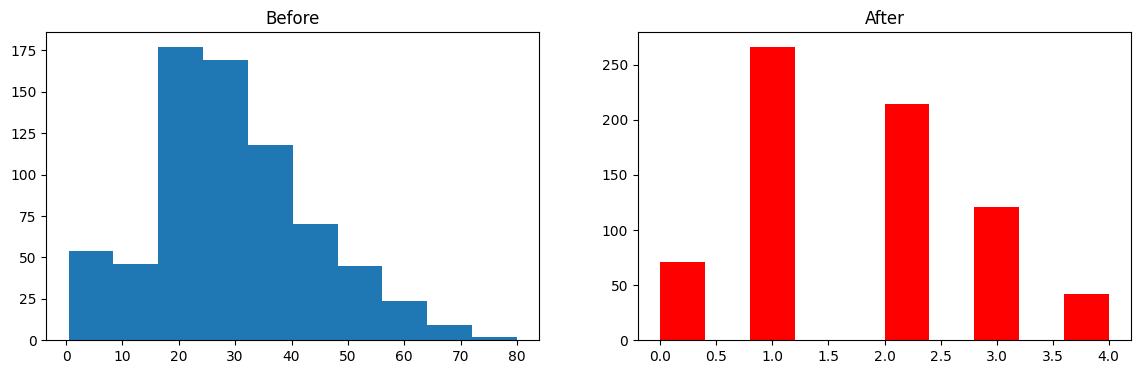

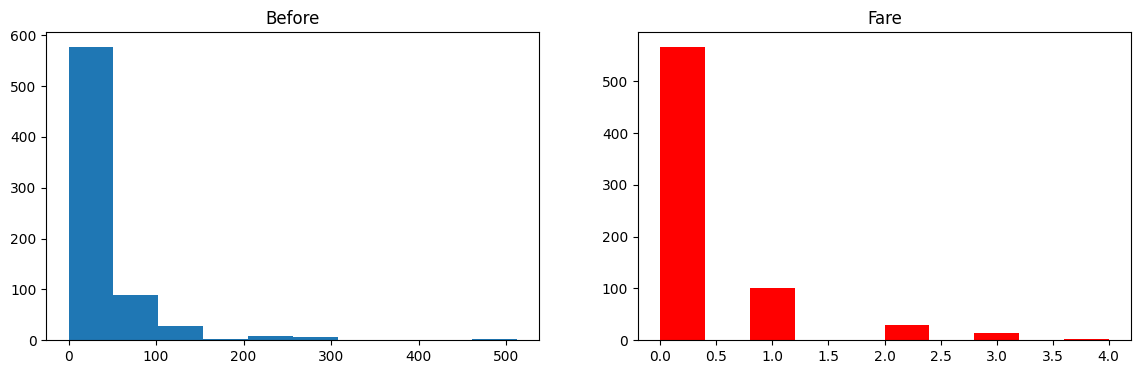

In [39]:
discretize(5,'kmeans')